In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F     
from torch import nn
import torch.utils.data as Data

### 1. 数据集构造

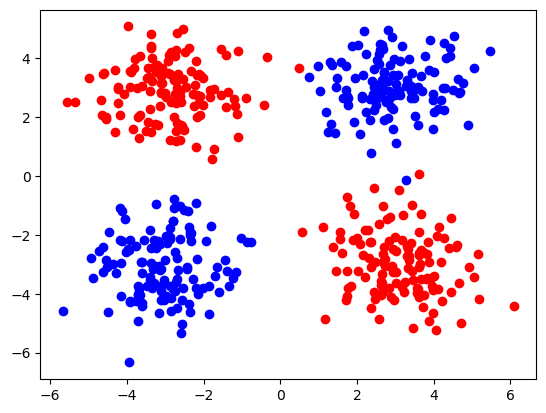

In [2]:
n = 500
x00 = np.random.randn(125, 2) + np.array([3,3])
x11 = np.random.randn(125, 2) + np.array([-3,-3])
x01 = np.random.randn(125, 2) + np.array([3,-3])
x10 = np.random.randn(125, 2) + np.array([-3,3])
X1 = np.vstack((x00, x11))
X2 = np.vstack((x10, x01))
Y1 = np.ones((250, 1))
Y2 = np.zeros((250, 1))
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'ro')
plt.show()

In [3]:
arr = np.arange(500)
np.random.shuffle(arr)
X = np.vstack((X1, X2))
Y = np.vstack((Y1, Y2))
X = X[arr,:]
Y = Y[arr,:]
X_train = X[:400,:]
Y_train = Y[:400,:]
X_test = X[400:,:]
Y_test = Y[400:,:]
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(400, 2) (100, 2) (400, 1) (100, 1)


In [4]:
X_train = torch.Tensor(X_train)
Y_train = torch.Tensor(Y_train)

### 2. 网络构造

In [5]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 使用Sequential定义
        self.model = nn.Sequential(
            nn.Linear(n_feature,n_hidden),
            nn.Sigmoid(),
            nn.Linear(n_hidden, n_output),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)             # 输出值
        return x

In [ ]:
# class Net2(nn.Module):
#     def __init__(self, n_feature, n_output):
#         super(Net2, self).__init__()
#         # 使用Sequential定义
#         self.model = nn.Sequential(
#             nn.Linear(n_feature, n_output),   # 单层网络
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         x = self.model(x)             # 输出值
#         return x
#
# net = Net2(2, 1)

### 3. 训练网络（无测试集、minibatch）

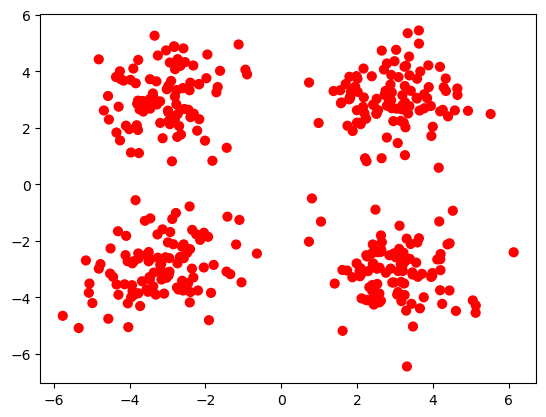

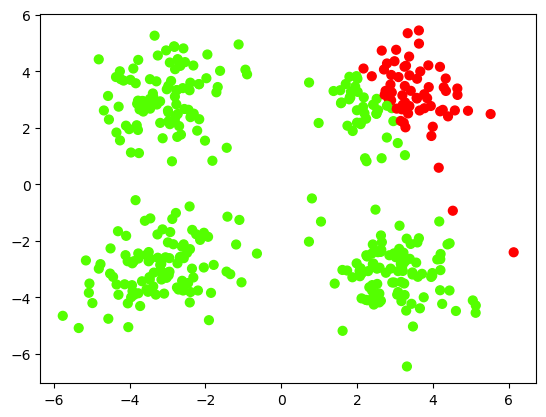

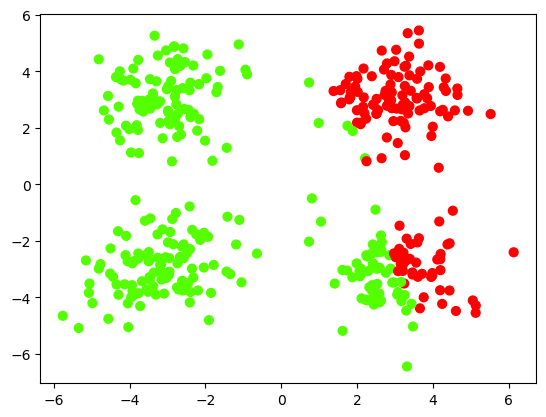

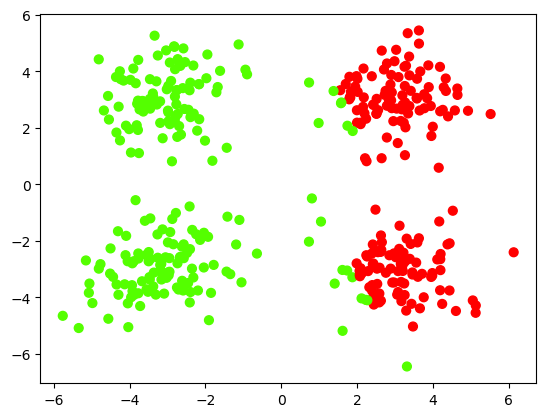

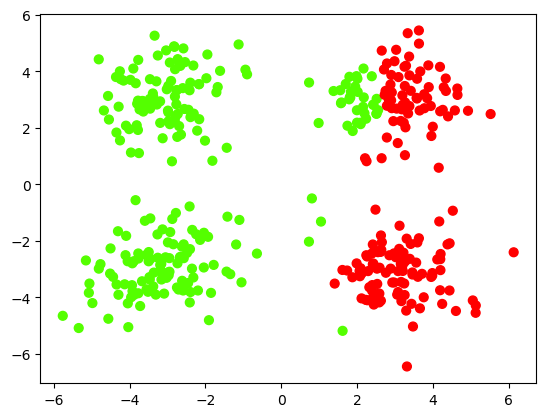

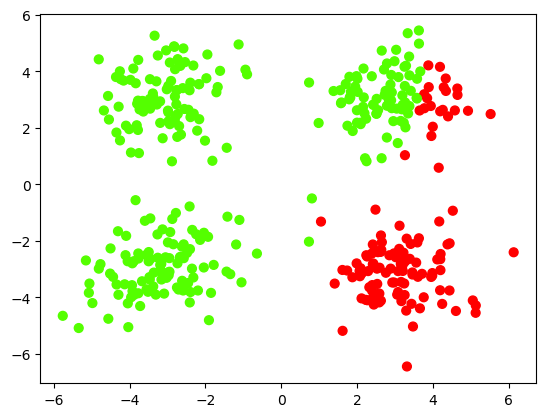

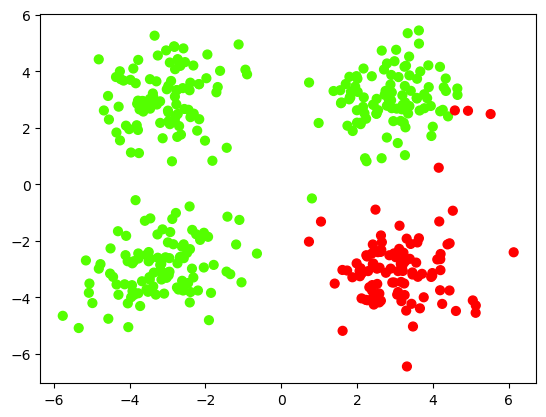

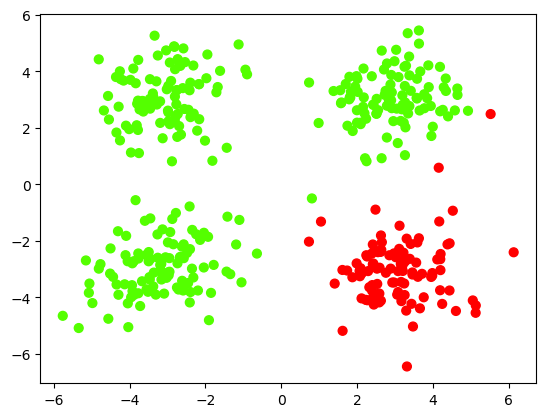

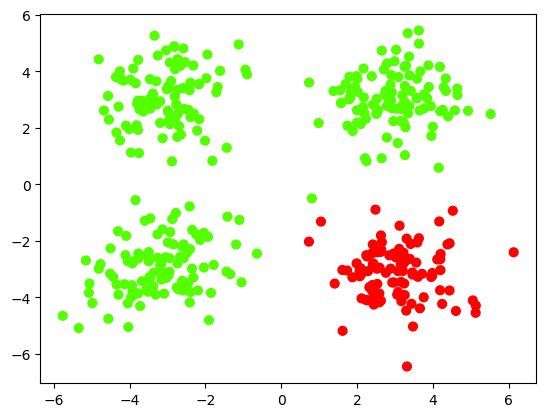

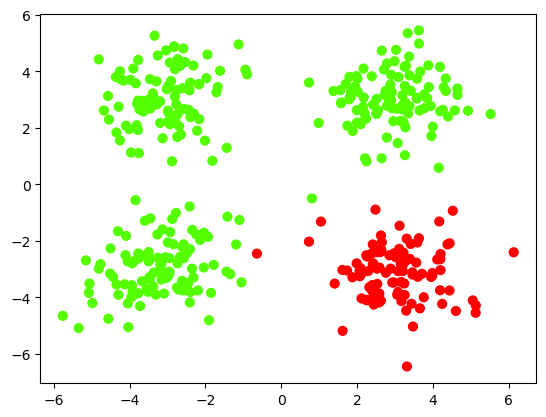

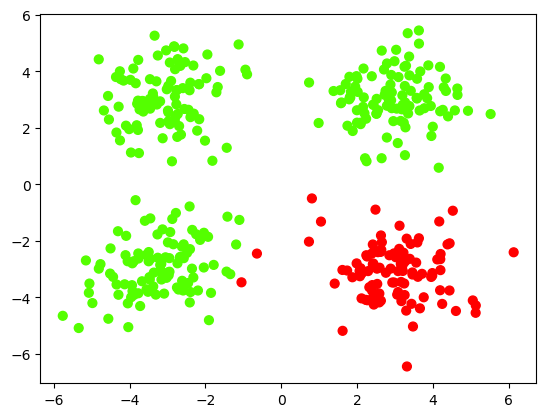

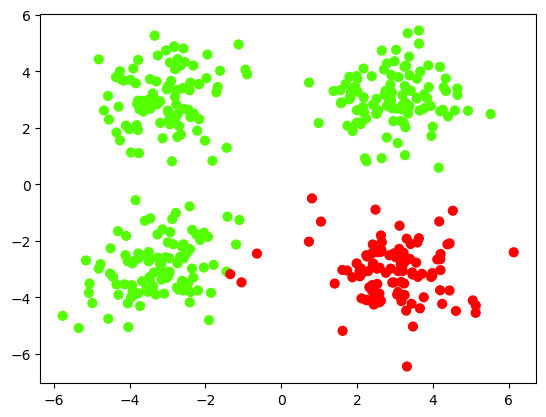

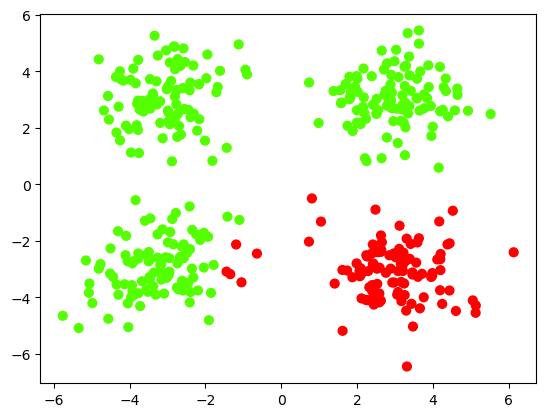

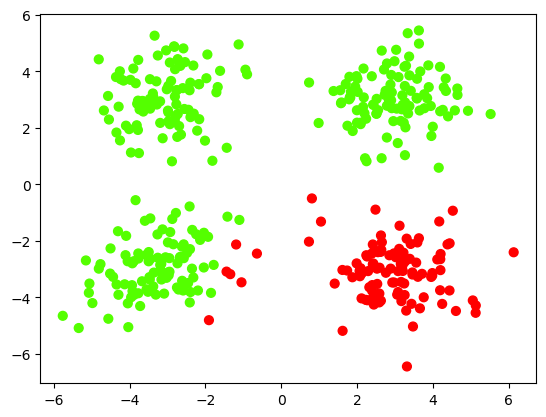

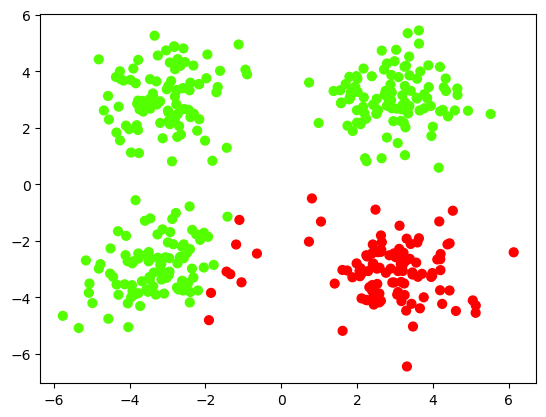

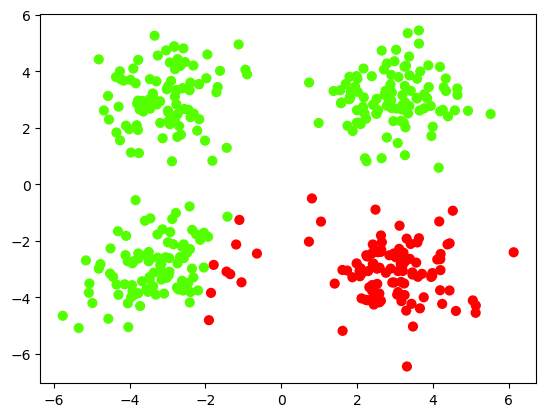

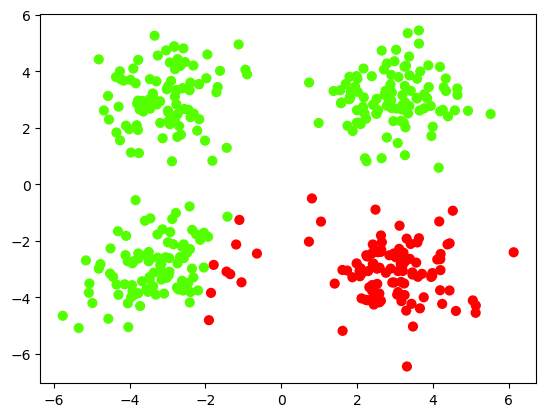

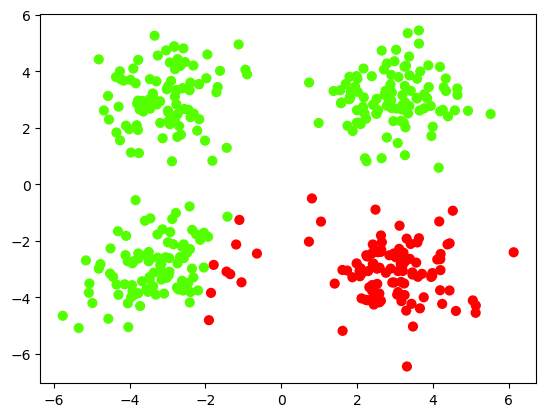

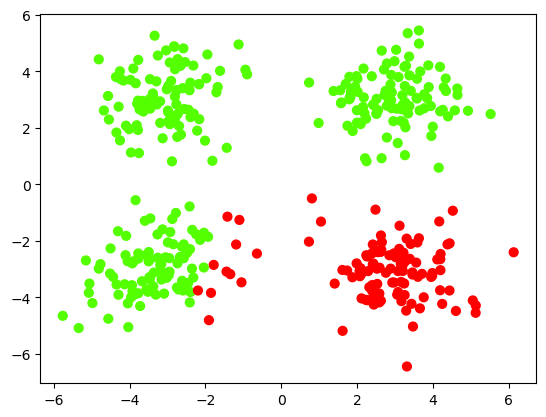

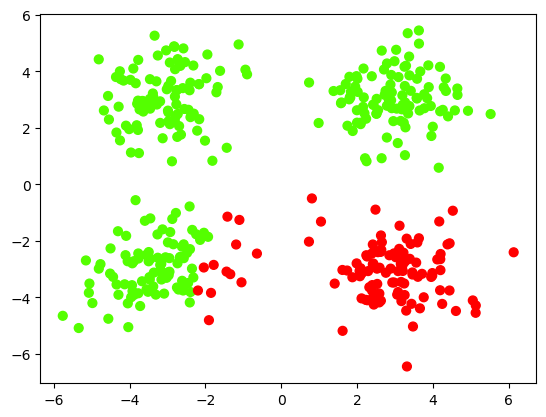

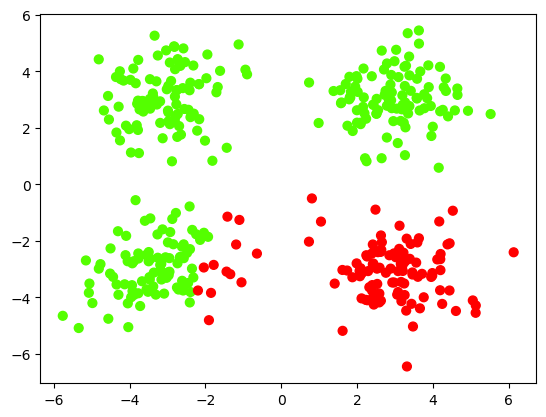

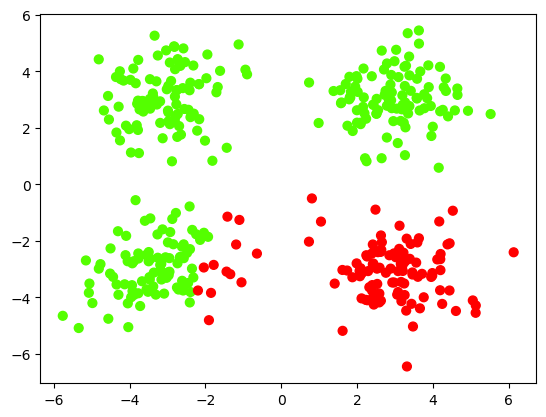

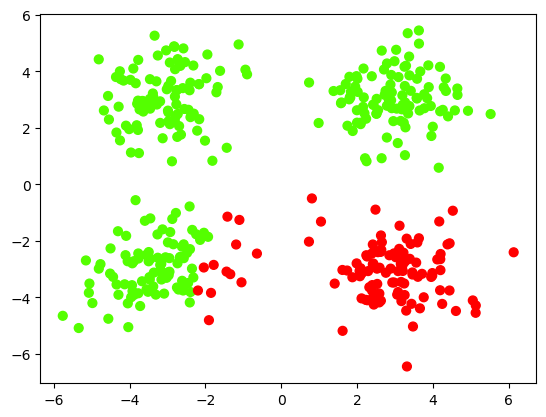

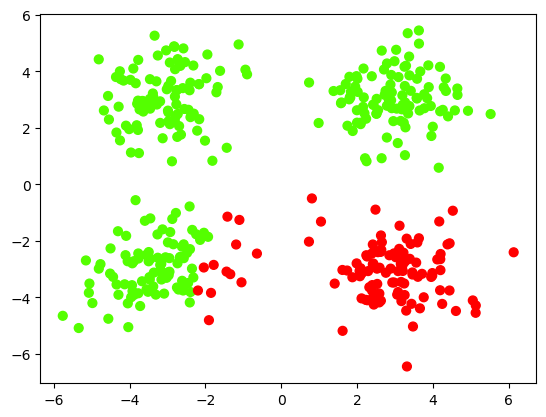

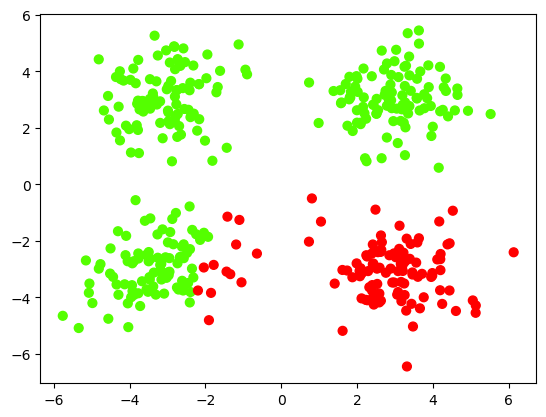

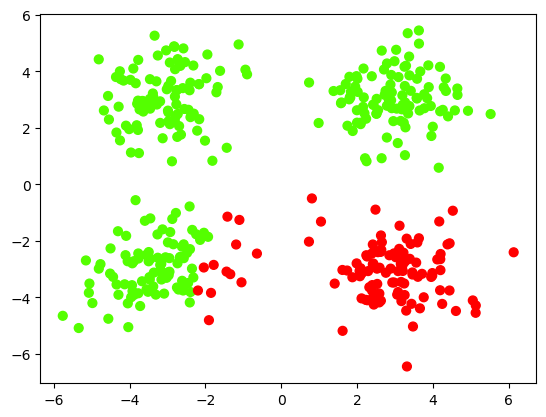

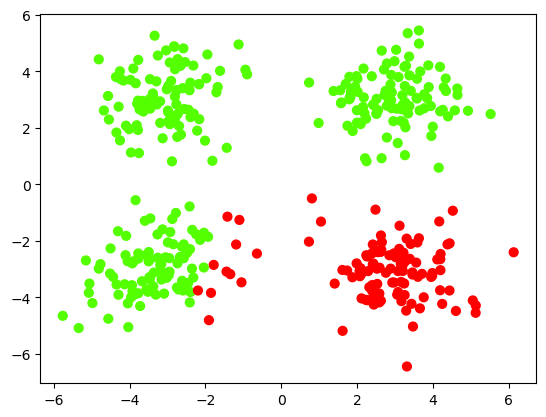

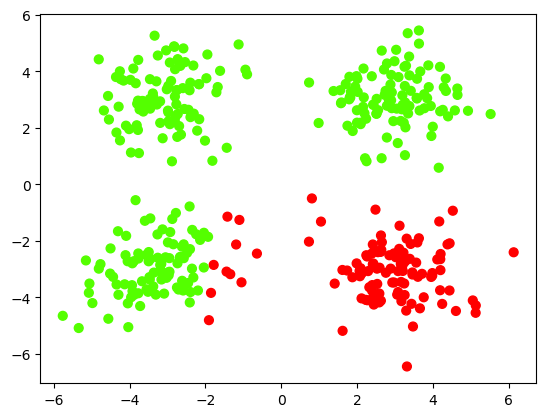

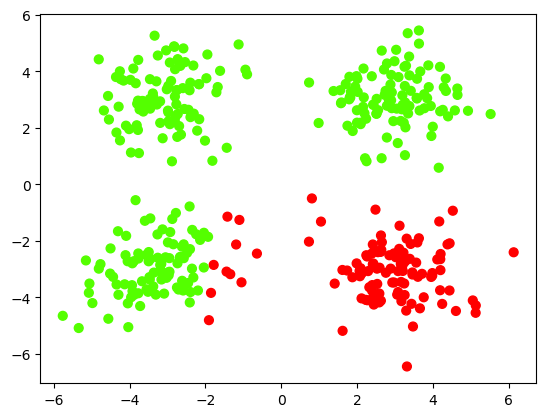

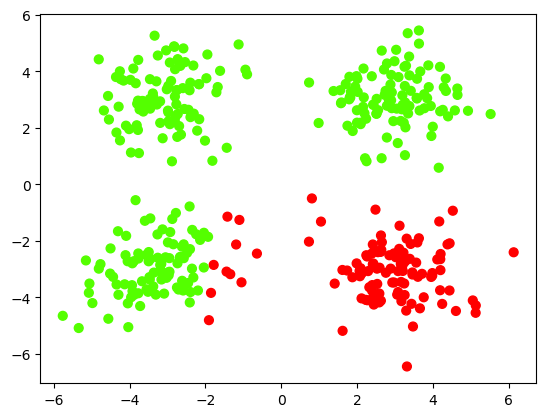

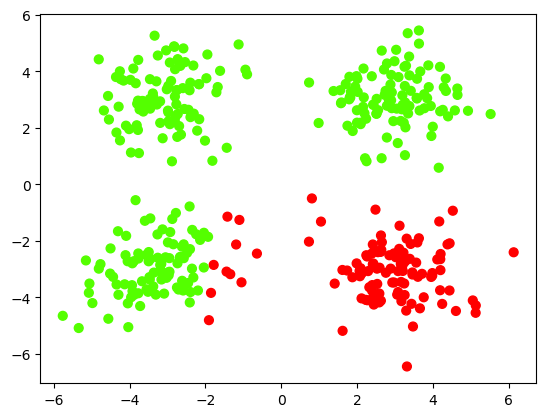

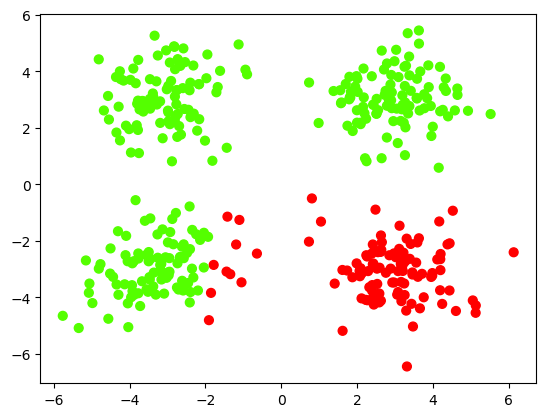

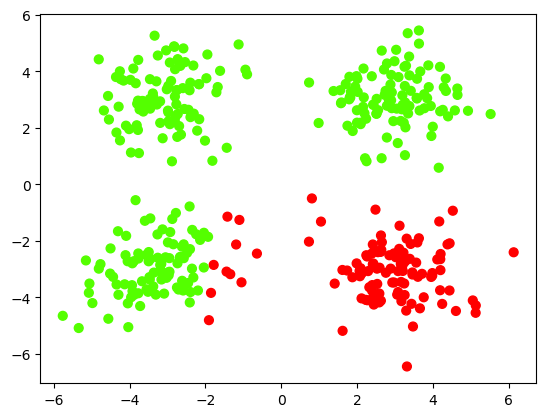

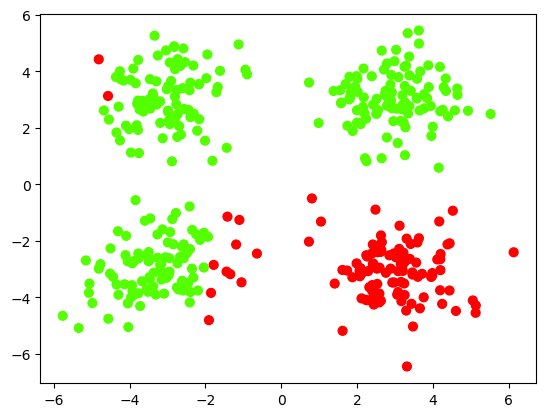

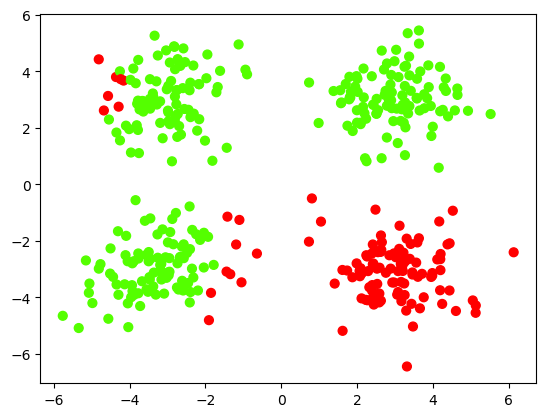

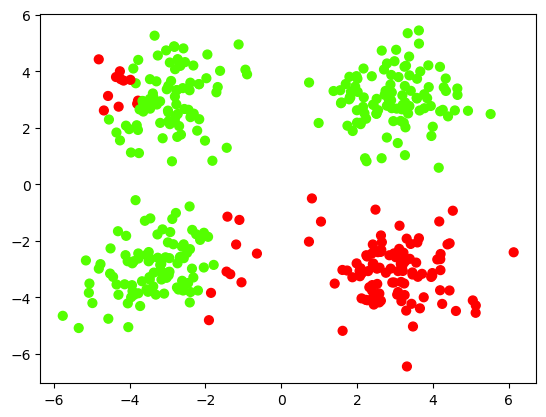

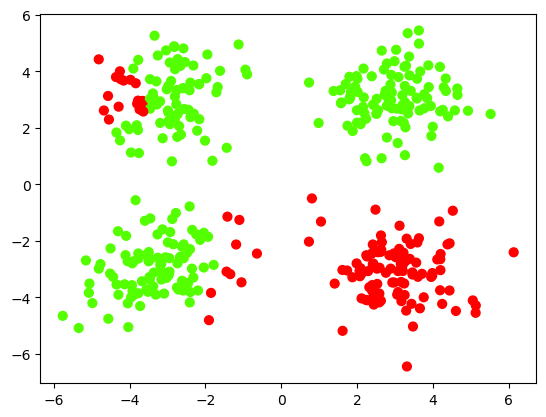

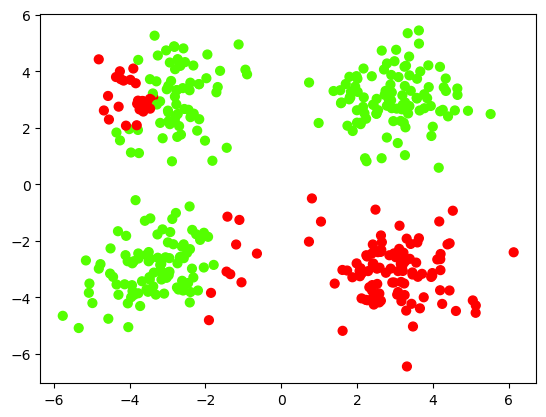

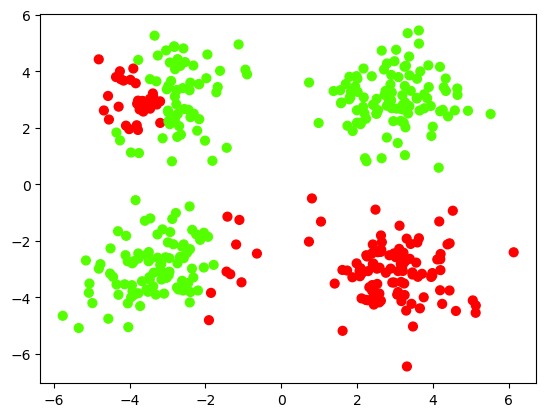

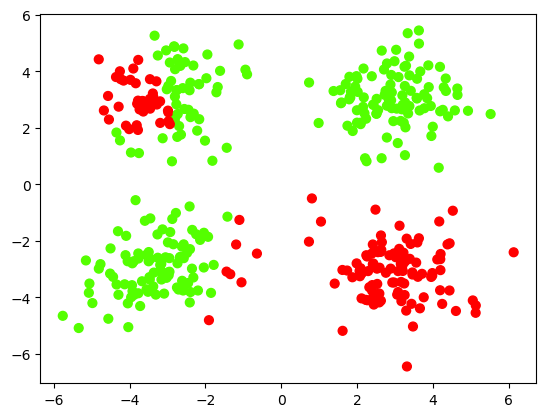

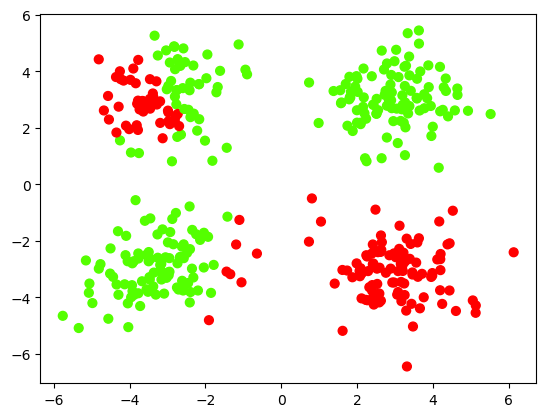

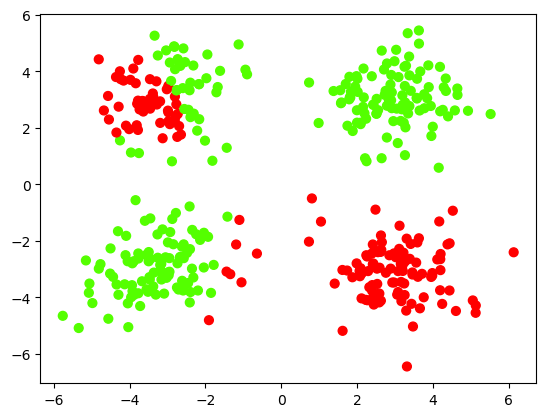

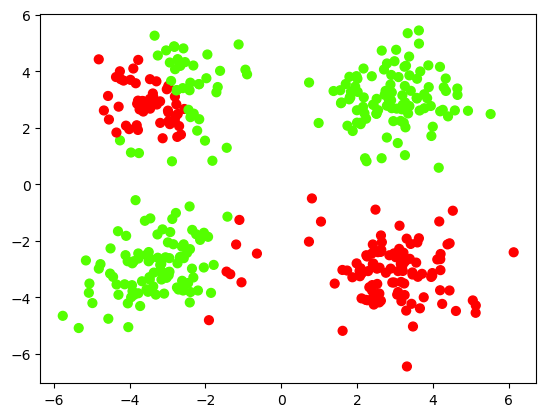

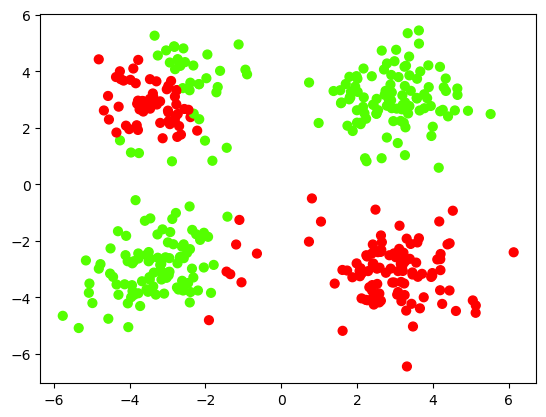

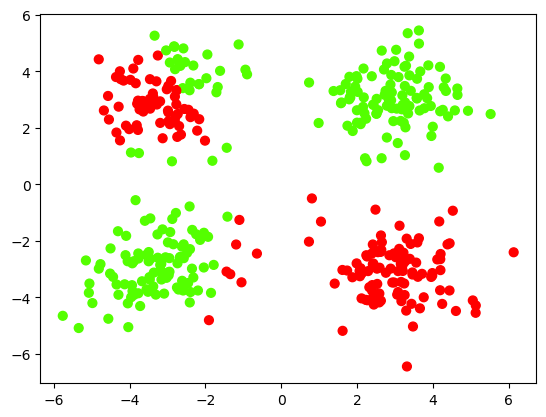

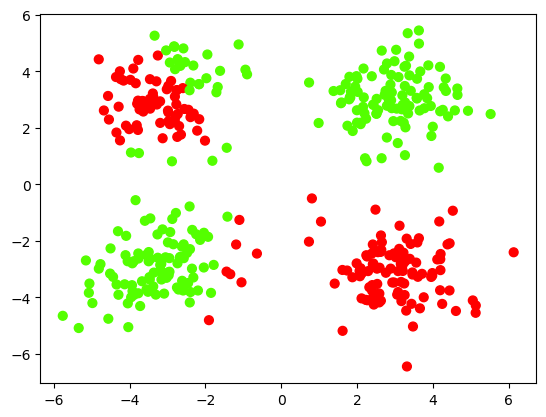

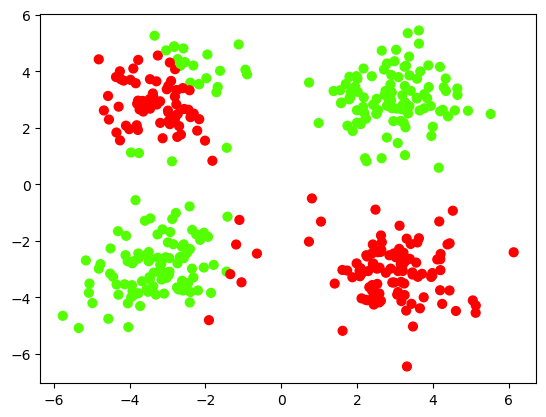

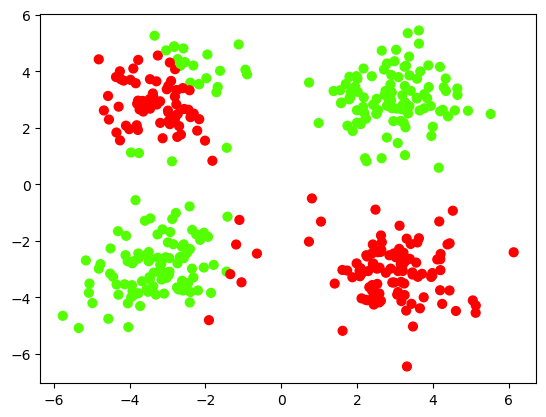

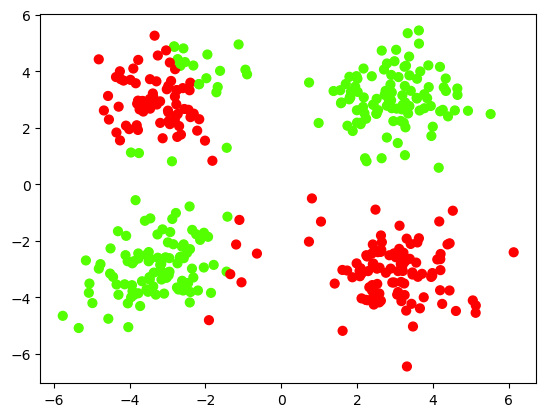

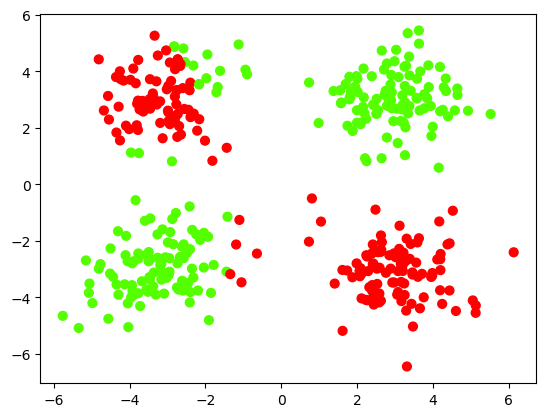

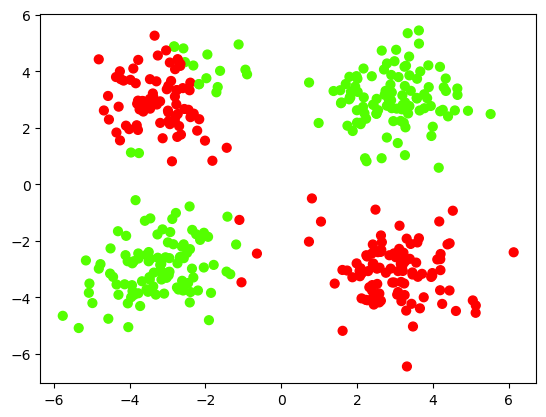

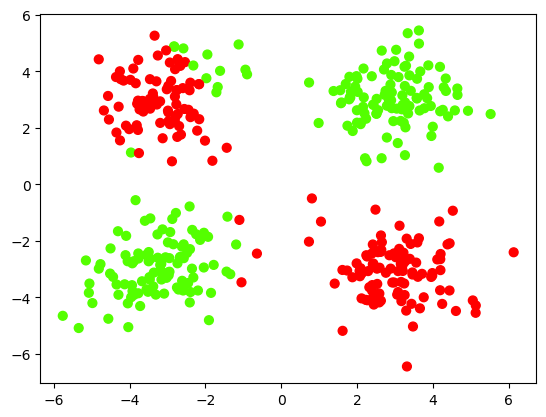

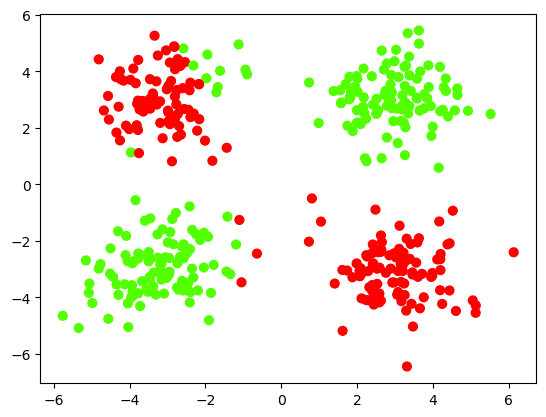

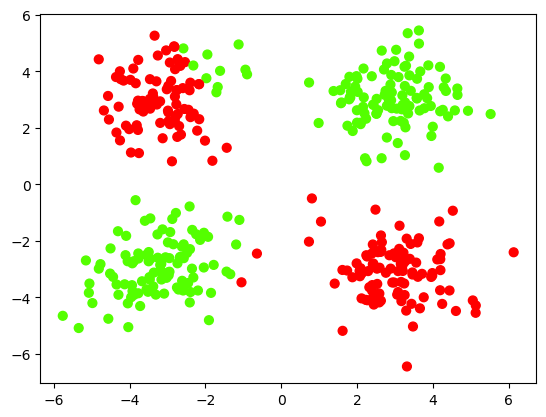

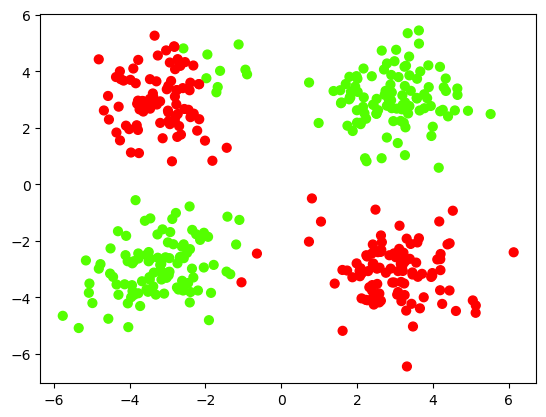

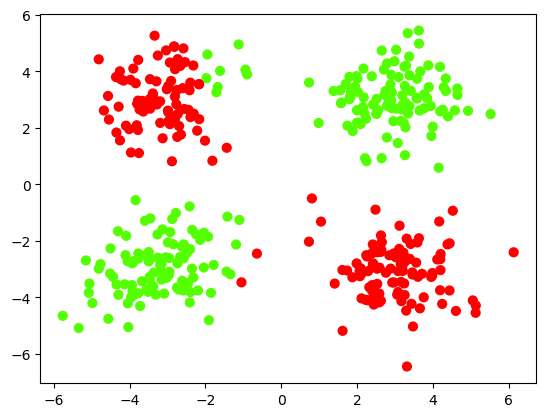

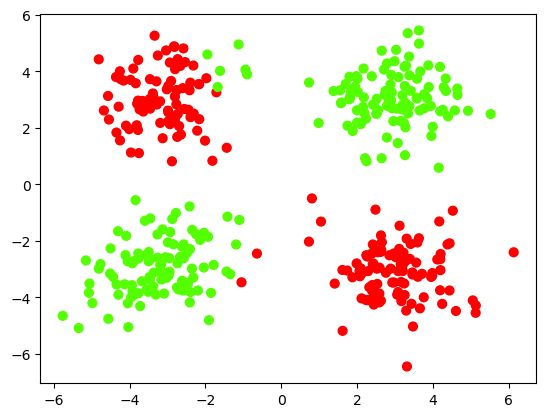

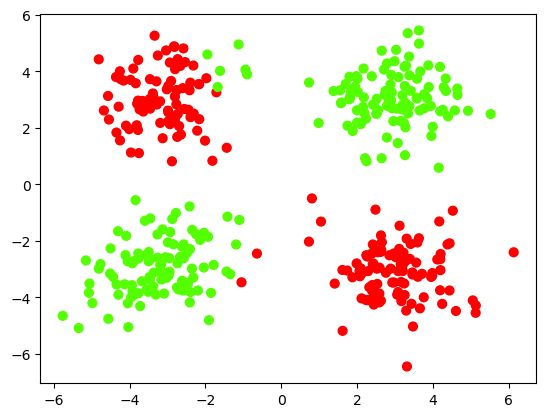

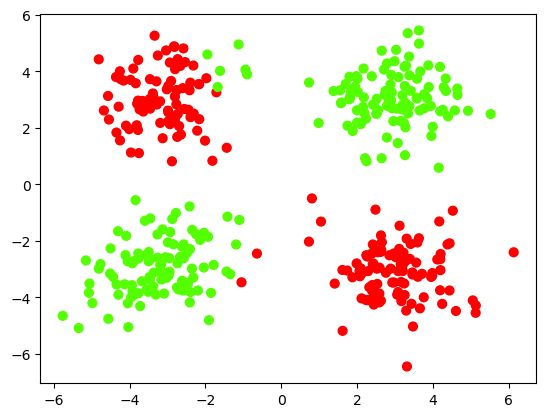

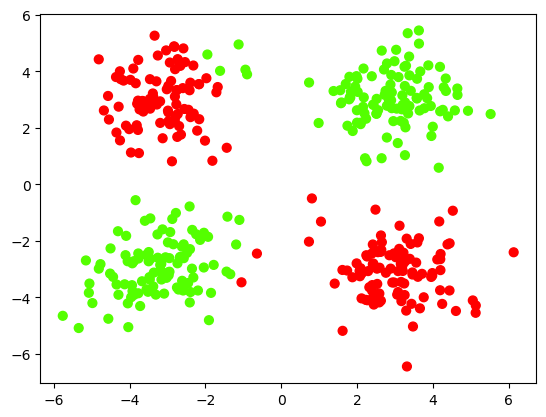

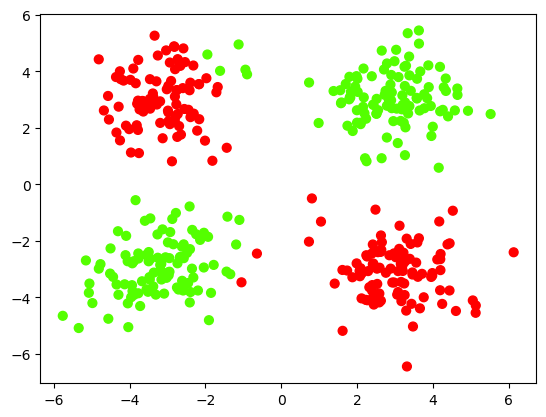

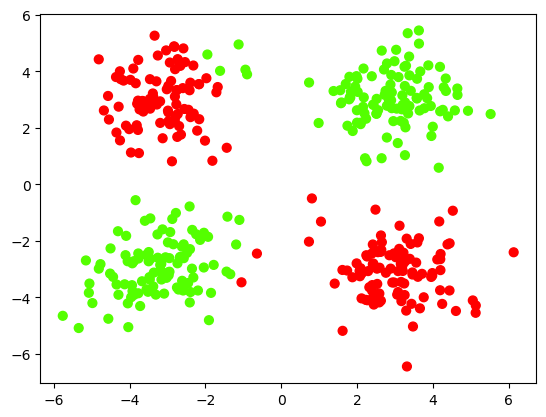

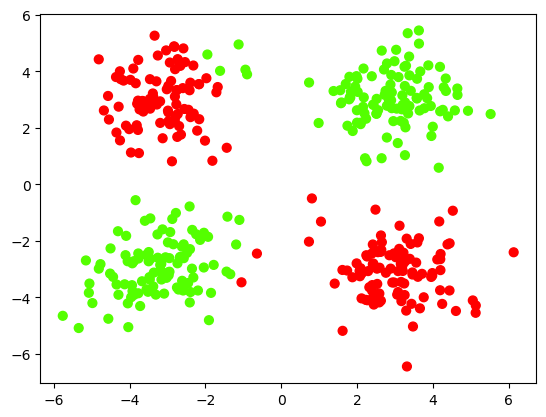

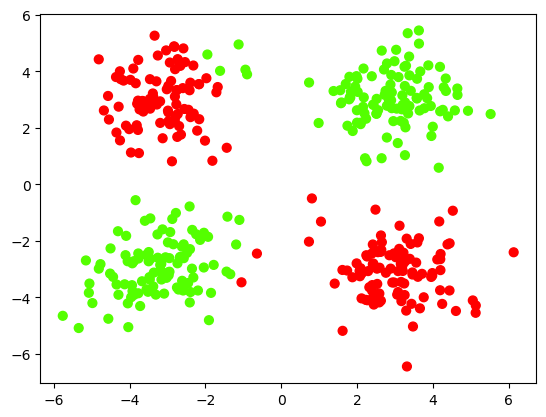

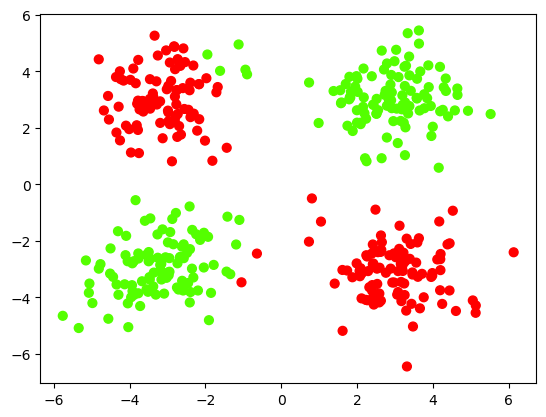

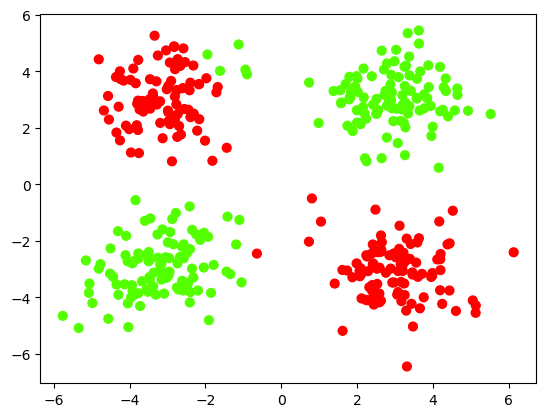

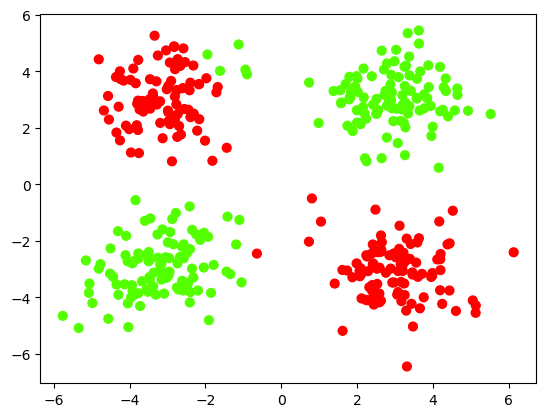

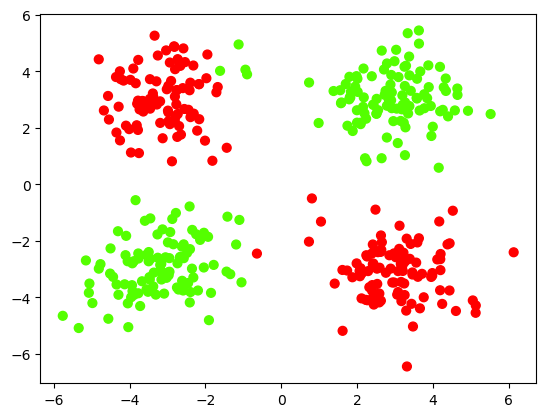

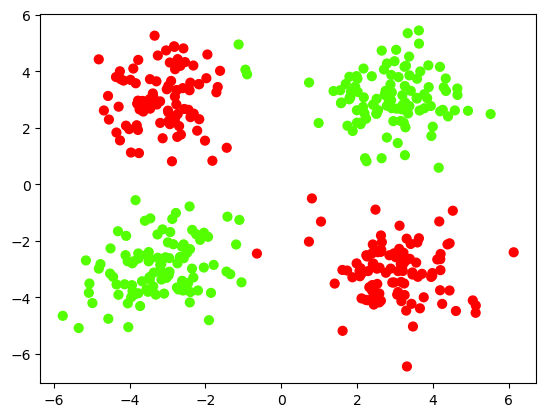

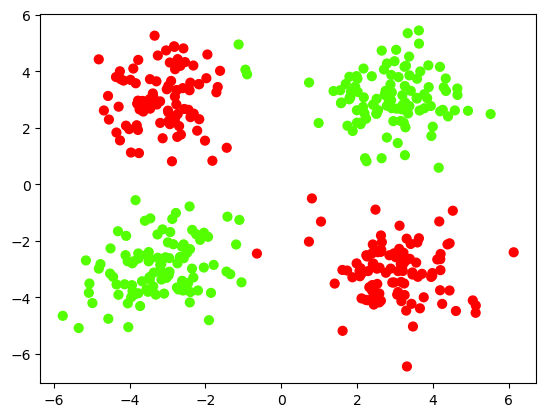

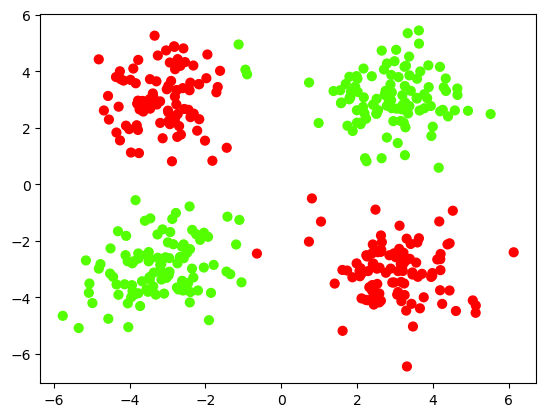

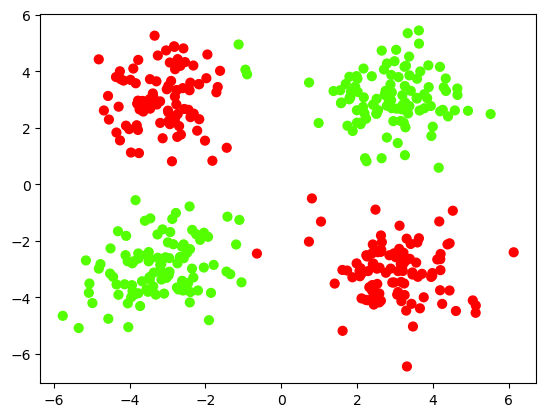

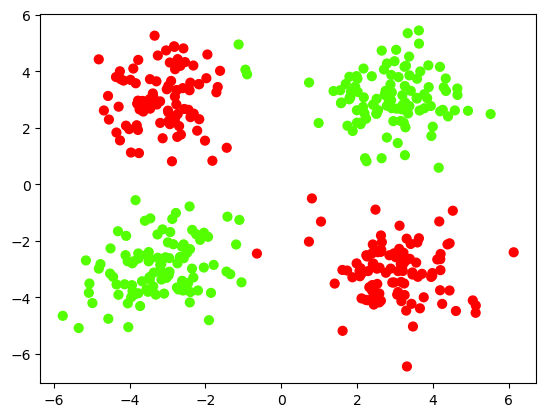

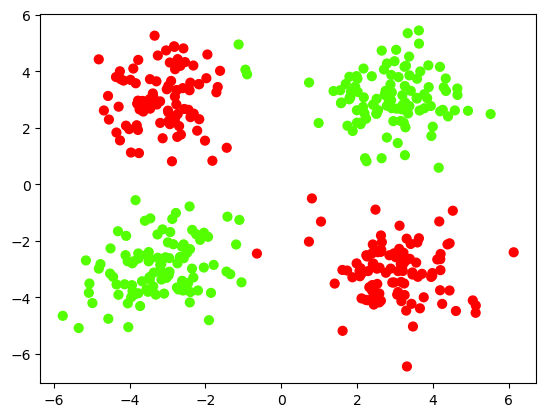

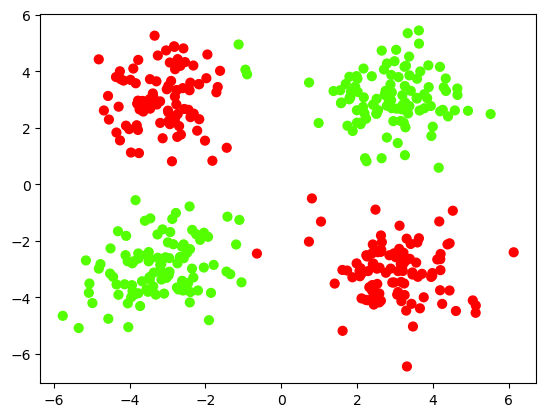

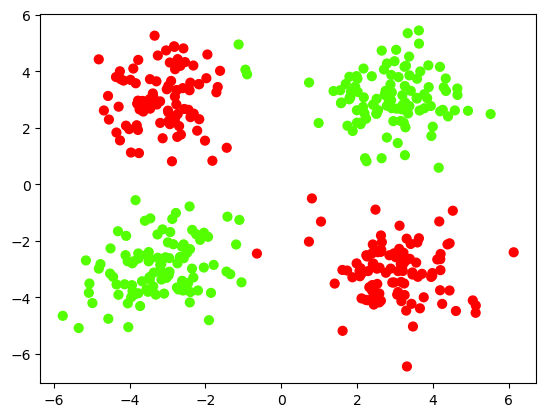

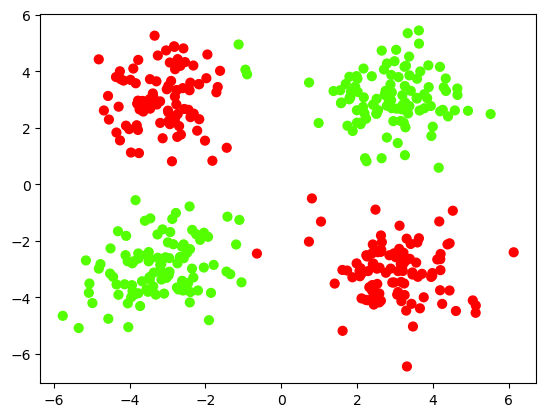

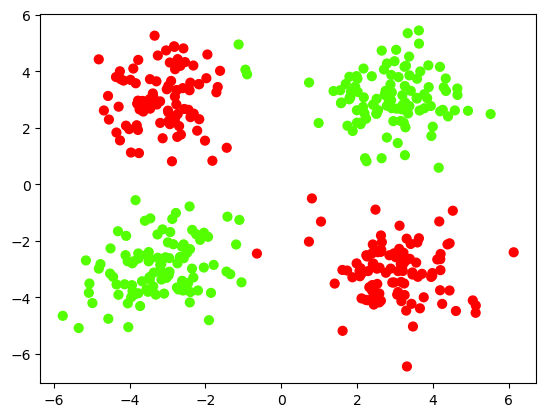

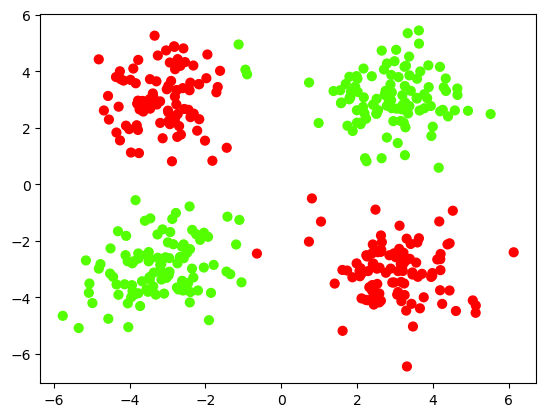

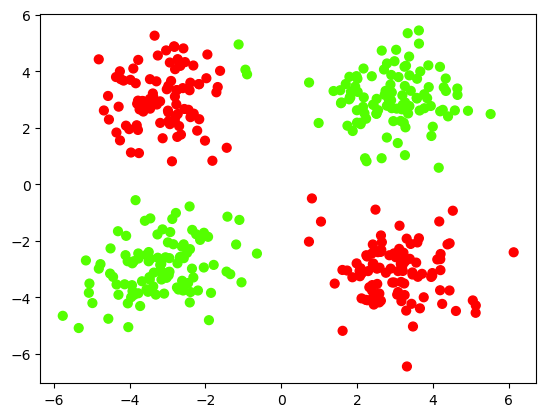

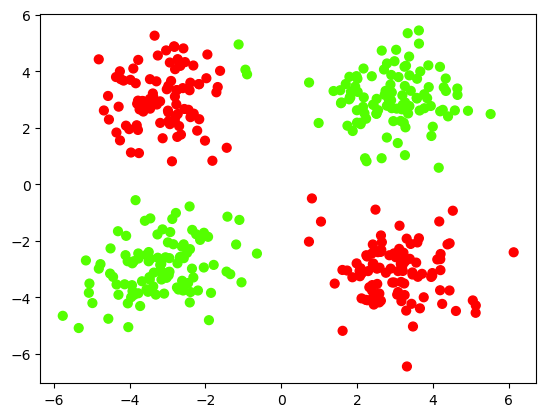

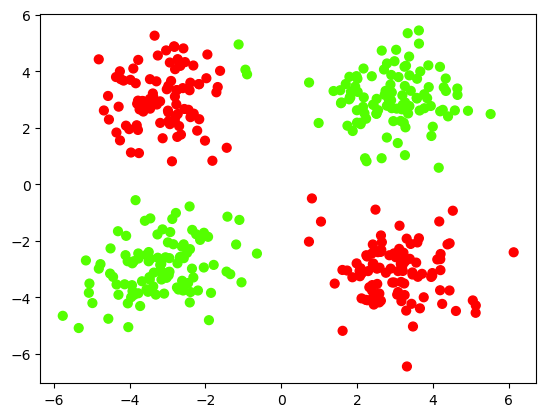

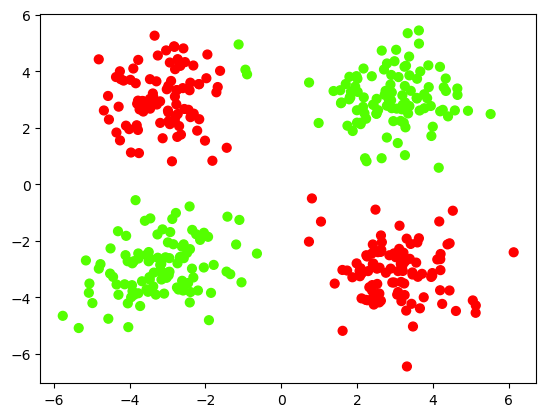

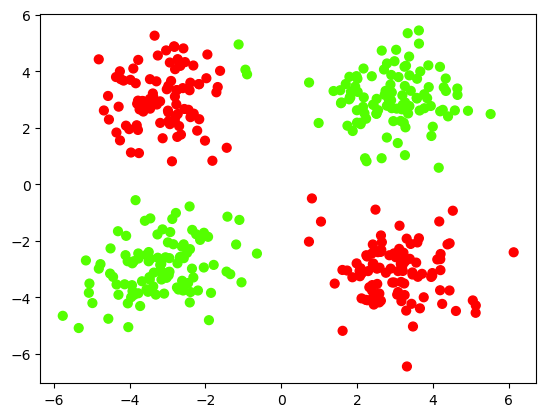

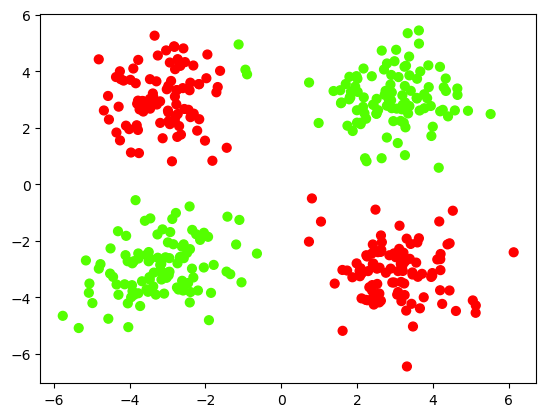

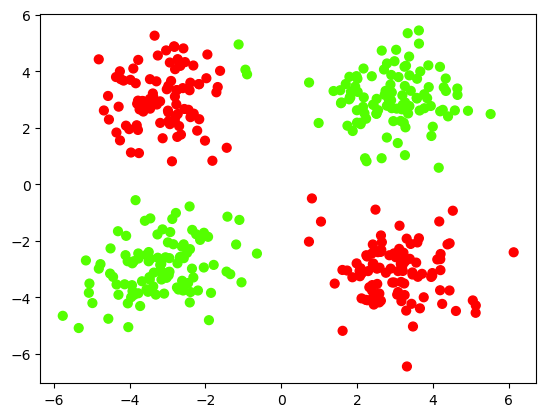

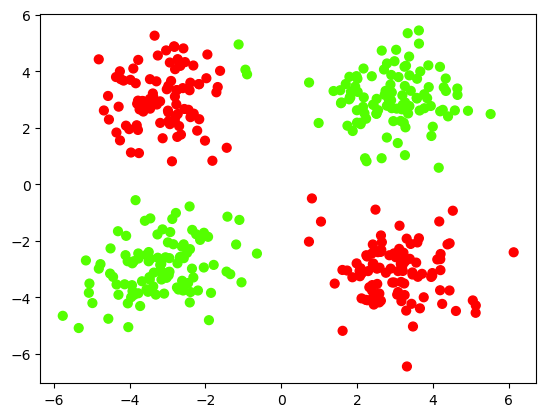

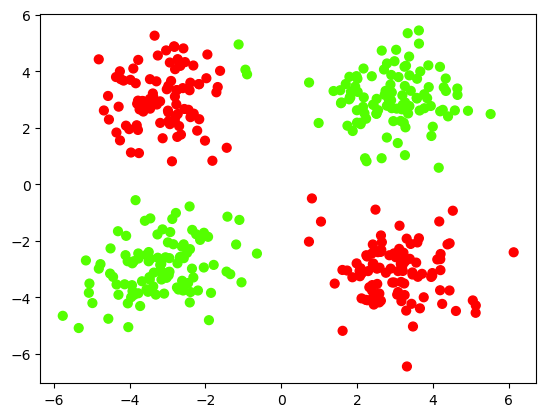

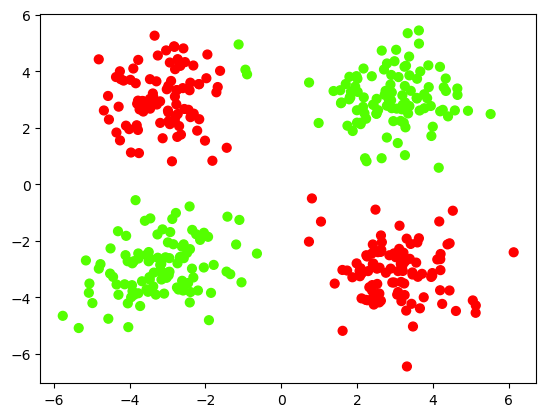

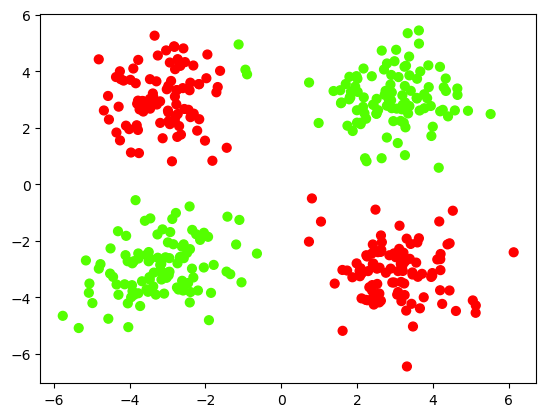

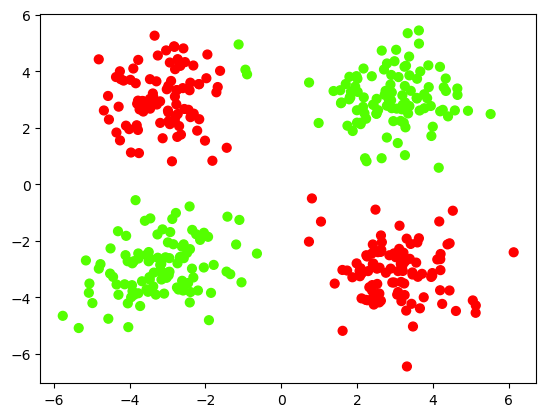

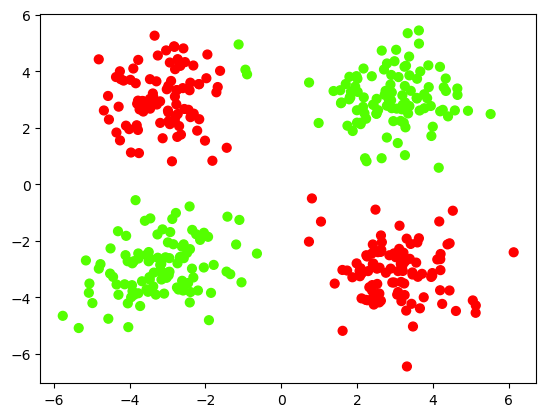

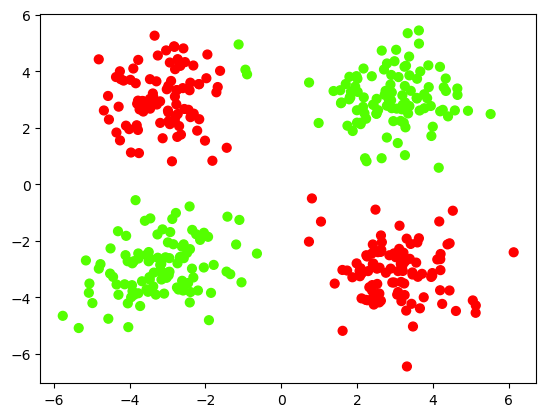

KeyboardInterrupt: 

In [7]:
net = Net(2, 20, 1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  # 传入 net 的所有参数, 学习率
criterion = nn.BCELoss()

plt.ion()   # 画图，.py下运行
for t in range(500):
    Y_out = net(X_train)
    loss = criterion(Y_out, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        plt.cla()
        Y_pred = (Y_out > 0.5) * 1
        plt.scatter(X_train.data.numpy()[:,0], X_train.data.numpy()[:,1], c=Y_pred, s=40, cmap=plt.cm.prism)
        plt.pause(0.2)
plt.ioff()
plt.show()

### 4. 训练网络（有测试集，无minibatch）

In [6]:
X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

In [8]:
net = Net(2, 20, 1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  # 传入 net 的所有参数, 学习率
criterion = nn.BCELoss()

acc_train_list = []
loss_train_list = []
acc_test_list = []
loss_test_list = []
for t in range(5000):
    # 开始训练
    net.train()
    Y_out = net(X_train)
    loss = criterion(Y_out, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        Y_pred_train = (Y_out > 0.5) * 1
        acc_train = np.mean(Y_pred_train.numpy() == Y_train.numpy())
        loss_train = loss.data.numpy()
        acc_train_list.append(acc_train)
        loss_train_list.append(loss_train)
        # 开始测试
        net.eval()
        Y_t_out = net(X_test)
        Y_pred_test = (Y_t_out > 0.5) * 1
        acc_test = np.mean(Y_pred_test.numpy() == Y_test.numpy())
        loss2 = criterion(Y_t_out, Y_test)
        loss_test = loss2.data.numpy()
        acc_test_list.append(acc_test)
        loss_test_list.append(loss_test)

        if t % 50 == 0:
            print('epoch[%d/5000]步:训练集loss[%.4f], acc[%.4f].测试集loss[%.4f], acc[%.4f]'%(t, loss_train, acc_train, loss_test, acc_test))

epoch[0/5000]步:训练集loss[0.7054], acc[0.4150].测试集loss[0.7092], acc[0.3000]
epoch[50/5000]步:训练集loss[0.6783], acc[0.6675].测试集loss[0.6827], acc[0.6200]
epoch[100/5000]步:训练集loss[0.6613], acc[0.7325].测试集loss[0.6639], acc[0.7200]
epoch[150/5000]步:训练集loss[0.6383], acc[0.9075].测试集loss[0.6407], acc[0.8900]
epoch[200/5000]步:训练集loss[0.6070], acc[0.9650].测试集loss[0.6098], acc[0.9300]
epoch[250/5000]步:训练集loss[0.5665], acc[0.9800].测试集loss[0.5696], acc[0.9800]
epoch[300/5000]步:训练集loss[0.5171], acc[0.9925].测试集loss[0.5203], acc[0.9900]
epoch[350/5000]步:训练集loss[0.4613], acc[0.9925].测试集loss[0.4647], acc[0.9900]
epoch[400/5000]步:训练集loss[0.4035], acc[0.9950].测试集loss[0.4070], acc[0.9900]
epoch[450/5000]步:训练集loss[0.3480], acc[0.9950].测试集loss[0.3518], acc[0.9900]
epoch[500/5000]步:训练集loss[0.2982], acc[0.9950].测试集loss[0.3023], acc[0.9900]
epoch[550/5000]步:训练集loss[0.2556], acc[0.9925].测试集loss[0.2600], acc[0.9900]
epoch[600/5000]步:训练集loss[0.2201], acc[0.9925].测试集loss[0.2250], acc[0.9900]
epoch[650/5000]步:训练集loss[0.1

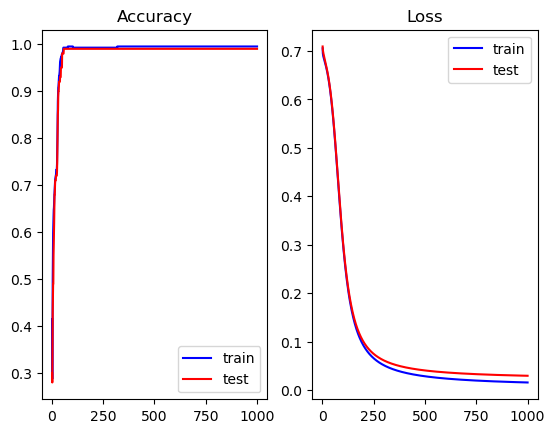

In [9]:
t = np.arange(1,1001)
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(t, np.array(acc_train_list), 'b-', label='train')
plt.plot(t, np.array(acc_test_list), 'r-', label='test')
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(t, np.array(loss_train_list), 'b-', label='train')
plt.plot(t, np.array(loss_test_list), 'r-', label='test')
plt.title("Loss")
plt.legend()
plt.show()

### 5. 训练网络（有测试集，有minibatch）

(40000, 2) (10000, 2) (40000, 1) (10000, 1)
epoch[0/100]:训练集loss[0.5420], acc[0.8659].测试集loss[0.2887], acc[0.9876]
epoch[1/100]:训练集loss[0.1611], acc[0.9890].测试集loss[0.0956], acc[0.9893]
epoch[2/100]:训练集loss[0.0746], acc[0.9895].测试集loss[0.0611], acc[0.9889]
epoch[3/100]:训练集loss[0.0533], acc[0.9905].测试集loss[0.0480], acc[0.9895]
epoch[4/100]:训练集loss[0.0438], acc[0.9906].测试集loss[0.0411], acc[0.9900]
epoch[5/100]:训练集loss[0.0382], acc[0.9909].测试集loss[0.0367], acc[0.9906]
epoch[6/100]:训练集loss[0.0344], acc[0.9913].测试集loss[0.0335], acc[0.9905]
epoch[7/100]:训练集loss[0.0315], acc[0.9920].测试集loss[0.0308], acc[0.9916]
epoch[8/100]:训练集loss[0.0292], acc[0.9923].测试集loss[0.0287], acc[0.9920]
epoch[9/100]:训练集loss[0.0273], acc[0.9926].测试集loss[0.0269], acc[0.9924]
epoch[10/100]:训练集loss[0.0256], acc[0.9931].测试集loss[0.0254], acc[0.9924]
epoch[11/100]:训练集loss[0.0241], acc[0.9935].测试集loss[0.0239], acc[0.9931]
epoch[12/100]:训练集loss[0.0229], acc[0.9937].测试集loss[0.0228], acc[0.9933]
epoch[13/100]:训练集loss[0.0217],

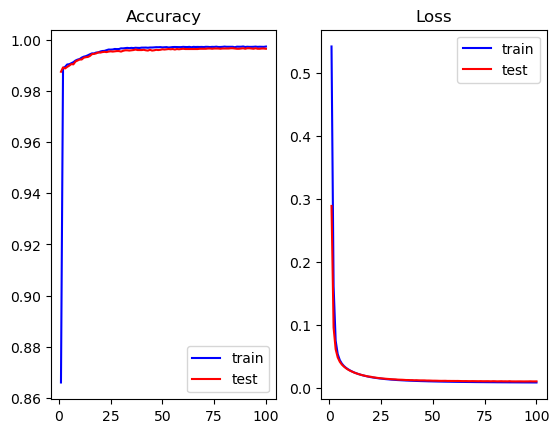

In [10]:
'''
最终完整代码(数据集扩大 收敛曲线 格式化输出 训练集测试集 minibatch)
'''

n = 50000
x00 = np.random.randn(12500, 2) + np.array([3,3])
x11 = np.random.randn(12500, 2) + np.array([-3,-3])
x01 = np.random.randn(12500, 2) + np.array([3,-3])
x10 = np.random.randn(12500, 2) + np.array([-3,3])
X1 = np.vstack((x00, x11))
X2 = np.vstack((x10, x01))
Y1 = np.ones((25000, 1))
Y2 = np.zeros((25000, 1))
# plt.plot(X1[:,0], X1[:,1], 'bo')
# plt.plot(X2[:,0], X2[:,1], 'ro')
# plt.show()

arr = np.arange(50000)
np.random.shuffle(arr)
X = np.vstack((X1, X2))
Y = np.vstack((Y1, Y2))
X = X[arr,:]
Y = Y[arr,:]
X_train = X[:40000,:]
Y_train = Y[:40000,:]
X_test = X[40000:,:]
Y_test = Y[40000:,:]
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

X_train = torch.Tensor(X_train)
Y_train = torch.Tensor(Y_train)
X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

train_dataset = Data.TensorDataset(X_train, Y_train)
test_dataset = Data.TensorDataset(X_test, Y_test)
train_data = Data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_data = Data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)

# print(len(train_dataset))

# for data in test_data:
#     x, y = data
#     print(x.shape, y.shape)

class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 使用Sequential定义
        self.model = nn.Sequential(
            nn.Linear(n_feature,n_hidden),
            nn.Sigmoid(),
            nn.Linear(n_hidden, n_output),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)             # 输出值
        return x

net = Net(2, 20, 1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)  # 传入 net 的所有参数, 学习率
criterion = nn.BCELoss()

acc_train_list = []
loss_train_list = []
acc_test_list = []
loss_test_list = []
for epoch in range(100):
    # 开始训练
    acc_train = 0.0
    loss_train = 0.0
    acc_test = 0.0
    loss_test = 0.0
    net.train()
    for x_train, y_train in train_data:
        y_out = net(x_train)
        loss = criterion(y_out, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_train = (y_out > 0.5) * 1
        acc_train += np.sum(y_pred_train.numpy() == y_train.numpy())
        loss_train += loss.data.numpy()*x_train.shape[0]
    acc_train_list.append(acc_train/len(train_dataset))
    loss_train_list.append(loss_train/len(train_dataset))

    net.eval()
    for x_test, y_test in test_data:
        y_test_out = net(x_test)
        loss2 = criterion(y_test_out, y_test)
        y_pred_test = (y_test_out > 0.5) * 1
        acc_test += np.sum(y_pred_test.numpy() == y_test.numpy())
        loss_test += loss2.data.numpy()*x_test.shape[0]
    acc_test_list.append(acc_test / len(test_dataset))
    loss_test_list.append(loss_test / len(test_dataset))

    print('epoch[%d/100]:训练集loss[%.4f], acc[%.4f].测试集loss[%.4f], acc[%.4f]' % (epoch, loss_train/len(train_dataset), acc_train/len(train_dataset),
                                                                 loss_test / len(test_dataset), acc_test / len(test_dataset)))


t = np.arange(1,101)
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(t, np.array(acc_train_list), 'b-', label='train')
plt.plot(t, np.array(acc_test_list), 'r-', label='test')
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(t, np.array(loss_train_list), 'b-', label='train')
plt.plot(t, np.array(loss_test_list), 'r-', label='test')
plt.title("Loss")
plt.legend()
plt.show()